In [2]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# 결측치 확인
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
X = df.drop(columns=['price','id','date'])
Y = df['price']


In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.39873715 -1.44746357 -0.97983502 ... -0.30607896 -0.9433552
  -0.26071541]
 [-0.39873715  0.1756067   0.53363434 ... -0.74634143 -0.43268619
  -0.18786773]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.39414129]
 [-0.39873715  0.50022075 -0.52252773 ...  1.02891048 -0.8412214
  -0.42051149]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.41794772]]


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

print(X_train.shape)

(17290, 18)


In [19]:
# Deeplearning
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

model.summary()

c:\Users\jshan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=16, validation_split= 0.2)
y_pred = model.predict(X_test)

Epoch 1/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 197053038592.0000 - mae: 292995.9375 - val_loss: 94817255424.0000 - val_mae: 219978.2188
Epoch 2/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 89944850432.0000 - mae: 196436.2656 - val_loss: 55340720128.0000 - val_mae: 162251.3594
Epoch 3/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 61752389632.0000 - mae: 165613.6250 - val_loss: 78315503616.0000 - val_mae: 218841.5781
Epoch 4/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 58996641792.0000 - mae: 162337.7969 - val_loss: 51038814208.0000 - val_mae: 156682.0938
Epoch 5/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 59442614272.0000 - mae: 160153.0781 - val_loss: 53568659456.0000 - val_mae: 153802.9375
Epoch 6/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 52781797376.0000 - mae: 154336.4531 - val_loss: 53492584448.0000 - val_mae: 161450.7969
Epoch 7/30
865/865 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 58480599040.0000 - mae: 158451.8906 - val_loss: 562

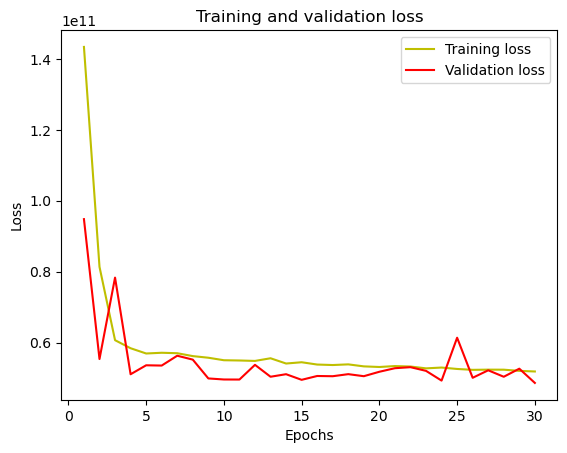

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()

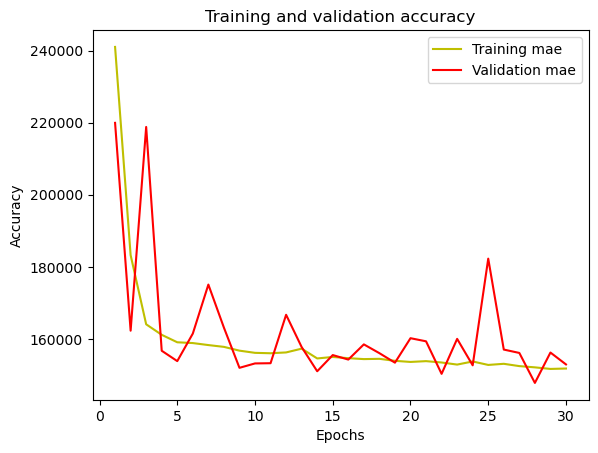

In [22]:
acc =model_history.history['mae']
val_acc =model_history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training mae')
plt.plot(epochs, val_acc, 'r', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()